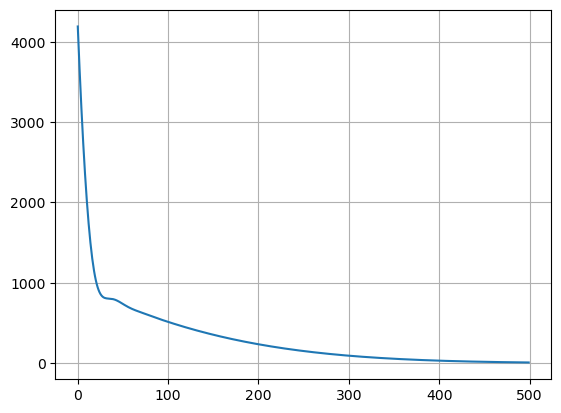

In [2]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#pip install tf-keras

import numpy as np
import pathlib
import matplotlib.pyplot as plt
# import tensorflow as tf
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tf_keras.optimizers import Adam
from tf_keras.utils import image_dataset_from_directory, to_categorical

c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

"""Jпределим модель НС, как последовательную, т.е. состоящую из слоев, идущих друг за другом
Добавим в эту модель слой нейронов, состоящий из одного нашего выходного нейрона, имеющий ровно один вход и линейную активационную функцию"""

model = Sequential(Dense(units=1, input_shape=(1,), activation='linear'))

'''Здесь units=1 означает один нейрон, а input_shape=(1,) – один вход. 
Конструктор Dense формирует полносвязный слой, то есть, все входы будут связаны со всеми нейронами данного слоя. 
В нашем простейшем случае – это связь W1 и дополнительно, автоматически, для каждого нейрона добавляется смещение – bias.''' 

'''Теперь, когда структура НС определена, ее нужно скомпилировать, указав критерий качества и способ оптимизации алгоритма градиентного спуска. 
В рамках данной задачи мы выберем минимум среднего квадрата ошибки и оптимизацию по Adam'''

model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

"""Здесь передается обучающая выборка для входных и выходных значений, затем, число эпох, 
т.е. выборка будет пропущена через сеть 500 раз и на каждой итерации будут корректироваться весовые коэффициенты и вычисляться значение критерия качества. 
Последний параметр указывает не отображать в консоли текущую информацию при обучении сети"""

log = model.fit(c, f, epochs=500, verbose=False)

plt.plot(log.history['loss'])
plt.grid(True)
plt.show()


In [3]:
model.predict([100])  # Он возвратит выходное значение и мы его отобразим в консоли.

1/1 [==============================] - 0s 82ms/step


array([[211.31029]], dtype=float32)

In [4]:
model.get_weights() # А для отображения весовых коэффициентов, запишем метод get_weights. А весовые коэффициенты были определены как 1,8 (X1) и 28 (baose)

[array([[1.824285]], dtype=float32), array([28.88179], dtype=float32)]

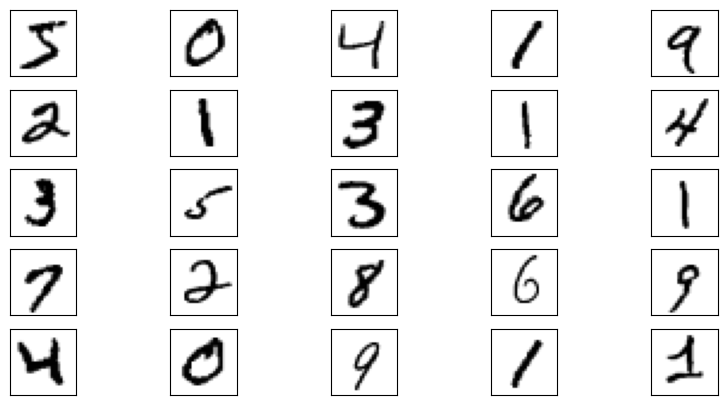

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


(60000,)

In [14]:
from tf_keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
 
plt.show()
print(y_train[:25])
y_train.shape

In [6]:
"""Первый слой должен преобразовывать изображение 28x28 пикселей в вектор из 784 элементов. Для такой операции в Keras можно создать слой специального вида – Flatten.
Следующий слой создадим с помощью уже известного нам класса Dense, который свяжет все 784 входа со всеми 128 нейронами. 
И такой же последний слой из 10 нейронов, который будет связан со всеми 128 нейронами предыдущего слоя"""

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])  # Итоговая модель
 
print(model.summary())     # вывод структуры НС в консоль

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [7]:
"""Стандартизуем данные"""
x_train = x_train / 255
x_test = x_test / 255

"""А нам нужен вектор с 1 на месте соответствующего числа, т.к. наша НС имеет 10 выходов, и каждый выход будет соответствовать определенной цифре: от 0 до 9.
Например [0,0,0,0,0,1,0,0,0,0] будет соответствовать цифре 5"""

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

"""Теперь выберем функцию потерь (loss function) и способ оптимизации градиентного алгоритма"""

model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

"""batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов.
Для каждой эпохи 20% случайных картинок из обучающей выборки будут помещаться в выборку валидации"""

model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

model.evaluate(x_test, y_test_cat)  # Метод evaluate прогоняет все тестовое множество и вычисляет значение критерия качества и метрики.

"""Кроме того, давайте выполним распознавания какого-либо тестового изображения"""


"""Здесь мы сначала выделяем из тензора n-е изображение и, затем, прогоняем его по сети, используя метод predict. 
На выходе получим 10 значений, по которым, затем, нужно будет определить правильность классификации цифр.
Полагаем, что максимальное значение как раз и будет соответствовать нужному классу."""

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )


Epoch 1/10

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.9175 - val_loss: 0.1580 - val_accuracy: 0.9548
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1319 - accuracy: 0.9613 - val_loss: 0.1357 - val_accuracy: 0.9579
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.9724 - val_loss: 0.1036 - val_accuracy: 0.9688
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.0901 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0877 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0862 - val_accurac

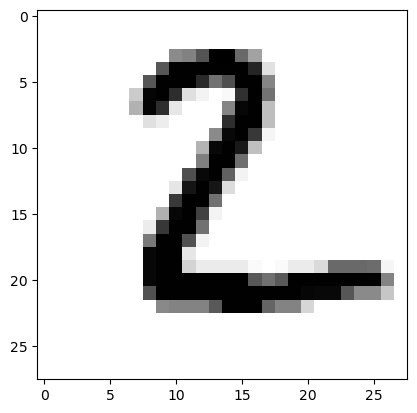

In [8]:
np.argmax(res)
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [9]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
 
print(pred.shape)
 
print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 816us/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [10]:
mask = pred == y_test
print(mask[:10])
 
x_false = x_test[~mask]
y_false = x_test[~mask]
 
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(219, 28, 28)


Значение сети: 7


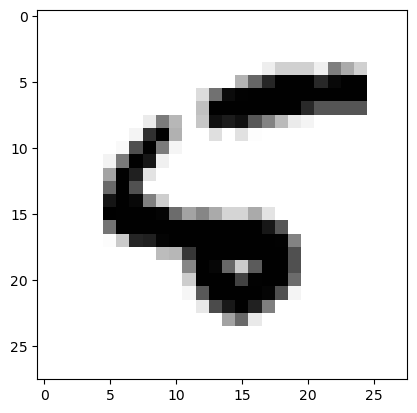

Значение сети: 2


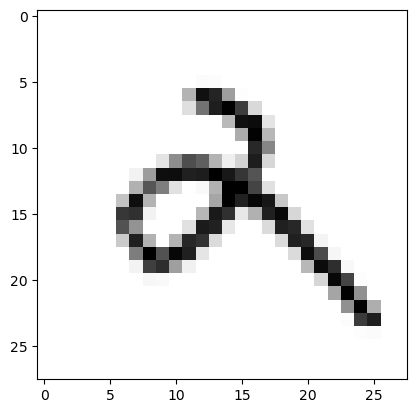

Значение сети: 1


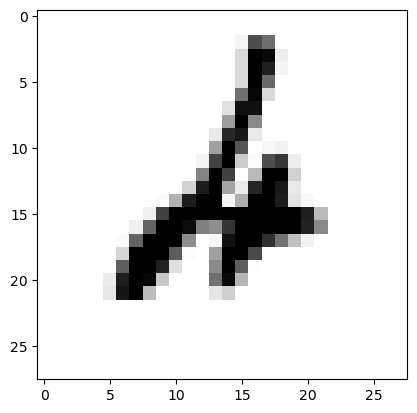

Значение сети: 0


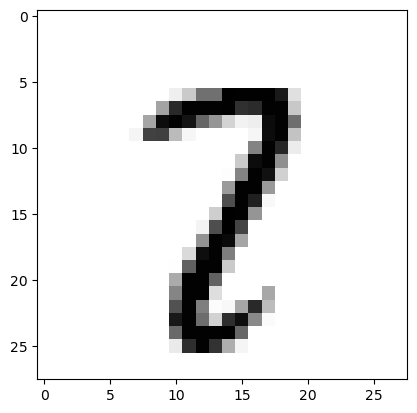

Значение сети: 4


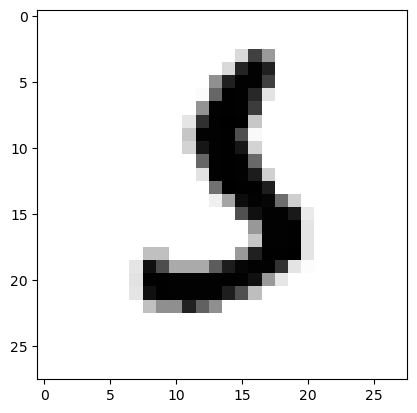

In [11]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()